# Random forest for stage delay estimation use CircuitOps Manager

> [https://github.com/xlindo/circuitops_manager](https://github.com/xlindo/circuitops_manager), 2024.11

## Prepare the CircuitOps object and extract the information for machine learning

In [1]:
import os
import sys

current_dir = os.path.abspath(os.getcwd())
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, f"{parent_dir}/src")

In [2]:
import circuitops_helper as coh
from circuitops_manager import CircuitOpsManager

In [3]:
TABLES_DIR = "../output/IRs/asap7/gcd/"  # or use yours

In [4]:
# read tables
(
    pin_df,
    cell_df,
    net_df,
    pin_pin_df,
    cell_pin_df,
    net_pin_df,
    net_cell_df,
    cell_cell_df,
    fo4_df,
) = coh.read_tables_OpenROAD(TABLES_DIR)

In [5]:
# check parsed data
print("fo4_df shape: ", fo4_df.shape)
print("pin_df.shape: ", pin_df.shape)
print("cell_df.shape: ", cell_df.shape)
print("net_df.shape: ", net_df.shape)
print("pin_edge_df.shape: ", pin_pin_df.shape)
print("cell_edge_df.shape: ", cell_pin_df.shape)
print("net_edge_df.shape: ", net_pin_df.shape)
print("net_cell_edge_df.shape: ", net_cell_df.shape)
print("cell_cell_edge_df.shape: ", cell_cell_df.shape)

fo4_df shape:  (900, 7)
pin_df.shape:  (1737, 18)
cell_df.shape:  (1522, 13)
net_df.shape:  (612, 8)
pin_edge_df.shape:  (2279, 6)
cell_edge_df.shape:  (1737, 4)
net_edge_df.shape:  (1736, 4)
net_cell_edge_df.shape:  (1737, 4)
cell_cell_edge_df.shape:  (1124, 4)


In [6]:
# update vertices
pin_df, cell_df, net_df, fo4_df = coh.update_vertices(pin_df, cell_df, net_df, fo4_df)

In [7]:
### generate edges
pin_pin_df, cell_pin_df, net_pin_df, net_cell_df, cell_cell_df, edge_df = (
    coh.generate_edge_df_OpenROAD(
        pin_df,
        cell_df,
        net_df,
        pin_pin_df,
        cell_pin_df,
        net_pin_df,
        net_cell_df,
        cell_cell_df,
    )
)

pin_pin shape: (2279, 8)
cell_pin shape: (1737, 6)
net_pin shape: (1736, 6)
net_cell shape: (1736, 6)
cell_cell shape: (1124, 6)


In [8]:
# update edges
pin_pin_df, cell_pin_df, net_pin_df, net_cell_df, cell_cell_df, edge_df = (
    coh.update_edges(
        pin_pin_df, cell_pin_df, net_pin_df, net_cell_df, cell_cell_df, edge_df
    )
)

In [9]:
# create CircuitOps Manager object
com = CircuitOpsManager(pin_df, cell_df, net_df, edge_df, fo4_df)

print(f"num of nodes {com._co.num_vertices()}, num of edges: {com._co.num_edges()}")

num of nodes 3871, num of edges: 8612


/mnt/d/shared/for_vdi/repos/xlindo_repos/circuitops_manager/src/circuitops_manager.py:427: RuntimeWarning: invalid value encountered in cast
  prop.a[: self.N_pin] = self._pin_df[prop_name].to_numpy()


In [10]:
### generate buffer tree
com.generate_buffer_tree()

Get Sub-GraphView: vertices:1737, edges:2279
DAG: True
Valid pins: 1690
Get Sub-GraphView: vertices:1690, edges:2233
DAG: True
buf tree start cnt:  74 buf tree end cnt:  421
num of buffer tree out pins:  93
num of buffer tree out pins:  93
num of buffer tree out pins:  41
num of buffer tree out pins:  41
num of buffer tree out pins:  17
num of buffer tree out pins:  17
num of buffer tree out pins:  2
num of buffer tree out pins:  2
num of buffer tree out pins:  1
num of buffer tree out pins:  1
num of buffer tree out pins:  1
num of buffer tree out pins:  1
num of buffer tree out pins:  1
num of buffer tree out pins:  1
num of buffer tree out pins:  1
num of buffer tree out pins:  1
num of buffer tree out pins:  1
num of buffer tree out pins:  1
num of buffer tree out pins:  1
num of buffer tree out pins:  1
num of buffer tree out pins:  1
num of buffer tree out pins:  1
num of buffer tree out pins:  1
num of buffer tree out pins:  1
num of buffer tree out pins:  1
num of buffer tree o

/mnt/d/shared/for_vdi/repos/xlindo_repos/circuitops_manager/src/circuitops_manager.py:229: RuntimeWarning: invalid value encountered in cast
  v_net_id.a[0 : self.N_pin] = self._pin_df.net_id.to_numpy()


In [11]:
# get selected pins info
selected_pin_df = com.get_selected_pins()
driver_pin_info, sink_pin_info = com.get_driver_sink_info(pin_pin_df, selected_pin_df)

In [12]:
sink_pin_info

,id,x,y,cap,net_id,cell_id,sink_risearr,sink_fallarr,driver_pin_id,driver_x,...,driver_arr,arc_delay_mean,arc_delay_min,arc_delay_max,net_delay_mean,net_delay_min,net_delay_max,stage_delay,arc_delay,net_delay
0,40,-2393.0,-774.0,6.125830e-16,3359.0,2732,1.490590e-10,1.534749e-10,1159,13166.0,...,1.487366e-10,5.507973e-11,5.326770e-11,5.689175e-11,3.257256e-13,3.257256e-13,3.257256e-13,5.721748e-11,5.689175e-11,3.257256e-13
1,49,-3430.0,252.0,5.956630e-16,3400.0,2734,2.104842e-10,2.326863e-10,41,10639.0,...,2.096892e-10,4.274729e-11,3.827989e-11,5.073748e-11,8.126146e-13,8.126146e-13,8.126146e-13,5.155009e-11,5.073748e-11,8.126146e-13
2,50,-1594.0,-846.0,6.125830e-16,3401.0,2734,1.884306e-10,2.158099e-10,46,8749.0,...,1.879819e-10,4.242101e-11,3.980466e-11,4.387095e-11,4.518024e-13,4.518024e-13,4.518024e-13,4.432275e-11,4.387095e-11,4.518024e-13
3,57,37.0,1872.0,5.982580e-16,3802.0,2736,1.425152e-10,1.483138e-10,1275,5336.0,...,1.423199e-10,5.008106e-11,4.731689e-11,5.284522e-11,1.967154e-13,1.967154e-13,1.967154e-13,5.304194e-11,5.284522e-11,1.967154e-13
4,58,253.0,522.0,5.956630e-16,3365.0,2736,1.528080e-10,1.554403e-10,1267,5066.0,...,1.526587e-10,5.308677e-11,5.033564e-11,5.583790e-11,1.502619e-13,1.502619e-13,1.502619e-13,5.598817e-11,5.583790e-11,1.502619e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,1391,-17.0,251.0,6.215530e-16,3394.0,3088,4.095041e-10,4.122431e-10,1084,3725.0,...,4.094498e-10,1.127952e-11,8.269169e-12,1.711059e-11,5.428696e-14,5.428696e-14,5.428696e-14,1.716487e-11,1.711059e-11,5.428696e-14
515,1394,-71.0,251.0,6.215530e-16,3395.0,3089,4.104566e-10,4.131573e-10,1099,7181.0,...,4.104049e-10,1.126942e-11,8.232919e-12,1.715503e-11,5.173899e-14,5.173899e-14,5.173899e-14,1.720677e-11,1.715503e-11,5.173899e-14
516,1397,-395.0,251.0,6.215530e-16,3396.0,3090,4.109056e-10,4.135643e-10,1114,8747.0,...,4.108446e-10,1.139771e-11,8.313079e-12,1.734154e-11,6.101478e-14,6.101478e-14,6.101478e-14,1.740256e-11,1.734154e-11,6.101478e-14
517,1400,37.0,-289.0,6.215530e-16,3397.0,3091,4.110188e-10,4.137129e-10,1129,11015.0,...,4.109704e-10,1.116022e-11,8.126741e-12,1.703389e-11,4.847426e-14,4.847426e-14,4.847426e-14,1.708236e-11,1.703389e-11,4.847426e-14


## Train a RandomForest

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt

# x, y: distance between driver and the target sink
# cap, cap_sum: sink capacitance
# driver_fo4_delay driver_libcell_delay_fixed_load: driving strength of the driver cell
# context_x_mean", context_x_min, context_x_max, context_x_std, context_y_mean, context_y_min, context_y_max, context_y_std: Context sink locations
features_ori = (
    sink_pin_info.loc[
        :,
        [
            "x",
            "y",
            "cap",
            "cap_sum",
            "driver_fo4_delay",
            "driver_fix_load_delay",
            "context_x_mean",
            "context_x_min",
            "context_x_max",
            "context_x_std",
            "context_y_mean",
            "context_y_min",
            "context_y_max",
            "context_y_std",
        ],
    ]
    .to_numpy()
    .astype(float)
)
labels_ori = sink_pin_info.loc[:, ["stage_delay"]].to_numpy().astype(float)

In [14]:
features_ori.shape, labels_ori.shape

((519, 14), (519, 1))

In [15]:
mask = labels_ori > 0
mask = mask.squeeze()

features = features_ori[mask]
labels = labels_ori[mask]

In [16]:
features = preprocessing.normalize(features, axis=0)
labels = preprocessing.normalize(labels, axis=0)
labels = labels.reshape(
    [
        -1,
    ]
)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.05)

In [17]:
# prepare data and train the RandomForestRegressor
nb_estim = 300
max_feat = 0.5
rfr = RandomForestRegressor(n_estimators=nb_estim, max_features=None)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_features=None, n_estimators=300)

In [18]:
edge_df

,src_id,tar_id,e_type
0,0,1.0,0
1,2,3.0,0
2,4,5.0,0
3,6,7.0,0
4,8,9.0,0
...,...,...,...
8607,3198,3200.0,4
8608,3198,3199.0,4
8609,3198,2921.0,4
8610,3199,2803.0,4


In [19]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     "n_estimators": [50, 100, 200, 300, 500],
#     "max_features": ["auto", "sqrt", "log2", None],
# }

# rfr = RandomForestRegressor()

# grid_search = GridSearchCV(
#     estimator=rfr, param_grid=param_grid, cv=5, scoring="neg_mean_squared_error"
# )

# grid_search.fit(X_train, y_train)

# print("Best parameters found: ", grid_search.best_params_)

# best_rfr = RandomForestRegressor(**grid_search.best_params_)
# best_rfr.fit(X_train, y_train)

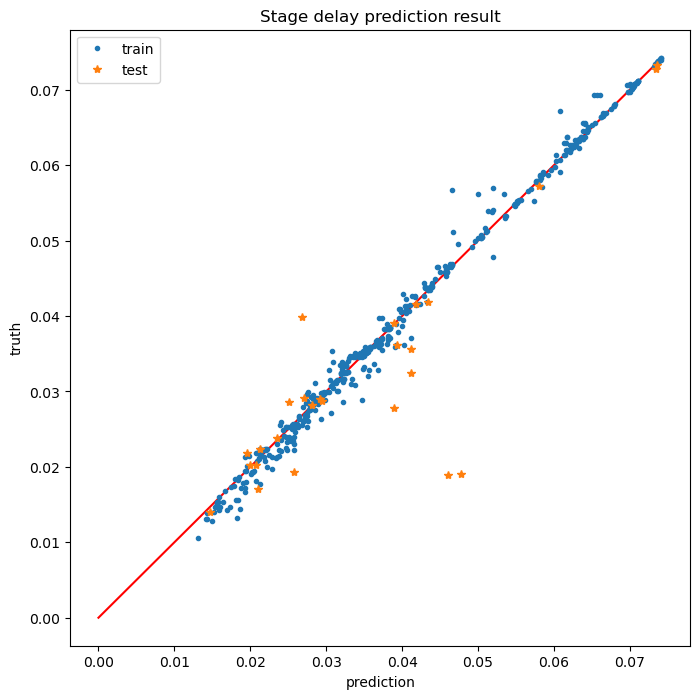

In [20]:
import numpy as np

# check training performance
pred_train = rfr.predict(X_train)
pred_test = rfr.predict(X_test)


max_range = max(max(y_train), max(pred_train), max(y_test), max(pred_test))

plt.figure(figsize=(8, 8))
plt.plot([0, max_range], [0, max_range], c="r")
plt.plot(pred_train, y_train, ".", label="train")
plt.plot(pred_test, y_test, "*", label="test")

plt.title("Stage delay prediction result")
plt.xlabel("prediction")
plt.ylabel("truth")
plt.legend()

In [21]:
pred_diff = np.concatenate((pred_train - y_train, pred_test - y_test))

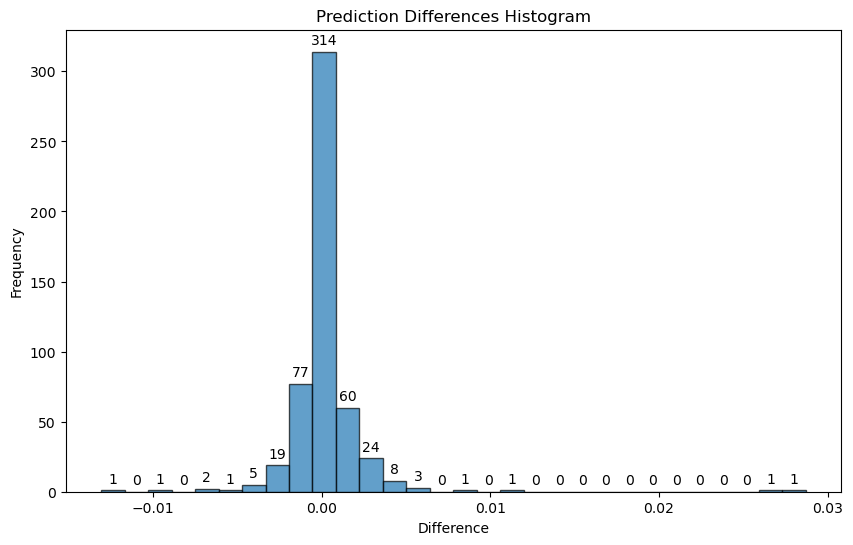

In [22]:
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(pred_diff, bins=30, edgecolor="black", alpha=0.7)

# 在每个柱子上方标注频数
for count, patch in zip(n, patches):
    height = count
    plt.annotate(
        f"{int(height)}",
        xy=(patch.get_x() + patch.get_width() / 2, height),
        xytext=(0, 3),  # 3 points vertical offset
        textcoords="offset points",
        ha="center",
        va="bottom",
    )

# 设置图表标题和轴标签
plt.title("Prediction Differences Histogram")
plt.xlabel("Difference")
plt.ylabel("Frequency")

# 显示图表
plt.show()